<h2>Feature Selection - Feature Selection based on Correlation coefficient</h2>

In [3]:
# load data
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from math import *

data = np.loadtxt('data_1.csv', delimiter = ',')

prediktori = np.delete(data, 13, axis = 1) # pred[i][j]
klase = np.delete(data, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], axis = 1) # klase[i][0] - classes 0 and 1

def column(matrix, p):
    return np.array([row[p] for row in matrix])

In [4]:
# no need for standardization, calculate std dev
sr_vr = [] # mean values vector for all features
std_dev = []
for j in range(0, 13):
    suma = 0
    std_clan = 0
    std2 = 0
    for i in range(0, len(prediktori)):
        suma += prediktori[i][j]
    sr_vr.append(suma / len(prediktori)) # mean values
    
    for k in range(0, len(prediktori)):
        std_clan += (prediktori[k][j] - sr_vr[j]) ** 2 # calculate the sum for std dev
    std2 = 1 / len(prediktori) * std_clan # std_dev ^ 2
    
    std_dev.append(sqrt(std2))

std_dev

[0.8853445189076193,
 0.8765773441269666,
 0.2960167914635966,
 3.38735457339753,
 15.322105699835227,
 0.5432916605308487,
 0.73492228788544,
 0.10866650028423509,
 0.5374924741457443,
 1.6195171243232753,
 0.16803975015791975,
 0.473335145286417,
 351.1545889283575]

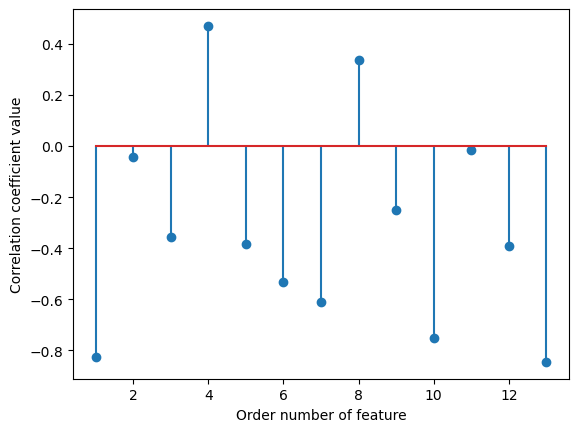

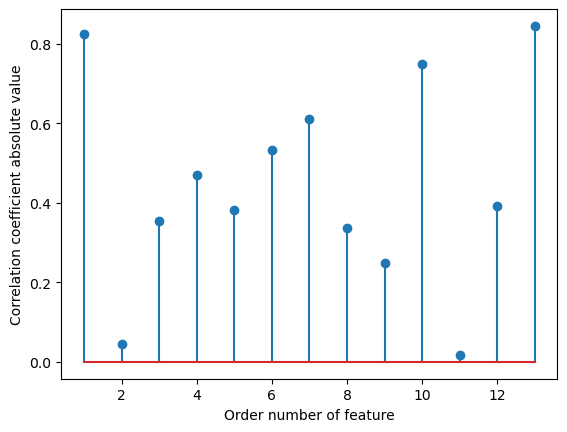

In [5]:
# Point-based correlation coefficient
ro = []
abs_ro = []

for i in range(0, 13):
    pred = column(prediktori, i)
    
    n = len(prediktori)
    n0 = 0
    n1 = 0
    suma_x0 = 0
    suma_x1 = 0
    M0 = 0
    M1 = 0
    
    for j in range(0, len(pred)):
        if(klase[j][0] == 0):
            n0 += 1
            suma_x0 += pred[j]
        if(klase[j][0] == 1):
            n1 += 1
            suma_x1 += pred[j]
            
    M0 = suma_x0 / n0
    M1 = suma_x1 / n1
    
    ro.append(((M1 - M0) / std_dev[i]) * sqrt((n1 * n0) / pow(n, 2)))
    abs_ro.append(abs(((M1 - M0) / std_dev[i]) * sqrt((n1 * n0) / pow(n, 2))))
    
x_osa = np.linspace(1, 13, 13)
y_osa = ro
indeksi = np.argsort(abs_ro)

plt.stem(x_osa, y_osa)
plt.xlabel('Order number of feature')
plt.ylabel('Correlation coefficient value')
plt.show()

plt.stem(x_osa, abs_ro)
plt.xlabel('Order number of feature')
plt.ylabel('Correlation coefficient absolute value')
plt.show()

In [6]:
for i in range(0, len(abs_ro)):
    najbolji_pred = max(abs_ro)
    print(i + 1, "best features is column number", indeksi[::-1][i] + 1)
    abs_ro.remove(max(abs_ro))

1 best features is column number 13
2 best features is column number 1
3 best features is column number 10
4 best features is column number 7
5 best features is column number 6
6 best features is column number 4
7 best features is column number 12
8 best features is column number 5
9 best features is column number 3
10 best features is column number 8
11 best features is column number 9
12 best features is column number 2
13 best features is column number 11
